In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from itertools import compress
#import statsmodels.api as sm
from scipy import stats

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
train_data.drop(['Id'] , axis=1 , inplace = True)

In [3]:
train_data.shape

(1460, 80)

In [4]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Removing columns with lots of NAs

In [5]:

na_fields = ((train_data.isnull().sum() / train_data.shape[0]) > 0.05 ).sort_values(ascending = False) # Identifying columns where na values are more than 5%
train_data.drop(list(compress(na_fields.index.values, na_fields)) , axis = 1 ,inplace=True)

### Cleaning data

In [6]:
train_data['BsmtQual'].fillna("No" ,inplace = True)
train_data['MoSold'] = train_data['MoSold'].astype(str)
train_data['MSSubClass'] = train_data['MSSubClass'].astype(str)

### Segregate variables into cont and cat

In [7]:
desc = train_data.describe()
desc.drop('SalePrice' , axis = 1,inplace = True)
num_variables = list(desc.columns)
cat_variables = [x for x in train_data.columns if x not in num_variables and x != 'SalePrice']
y = train_data['SalePrice']

In [8]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [9]:
## Replace NA


### Check for individual correlations for numerical variables

In [10]:
#  [ train_data[var] , train_data['SalePrice'] for var in num_variables]
    
#model = sm.OLS(train_data['SalePrice'] , sm.add_constant(train_data['LotFrontage'] ), missing = 'drop').fit()
#model.s



### Check for individual correlations for categorical variables

In [11]:
train_data_num = train_data[num_variables] 
cor_matrix = np.corrcoef(train_data_num.assign(SalePrice = y),rowvar=False)

pd.DataFrame({ 'variable': train_data_num.columns , 'corr': cor_matrix[:-1,-1] }).sort_values('corr' , ascending = False)


,variable,corr
1,OverallQual,0.790982
13,GrLivArea,0.708624
22,GarageCars,0.640409
23,GarageArea,0.623431
9,TotalBsmtSF,0.613581
10,1stFlrSF,0.605852
16,FullBath,0.560664
20,TotRmsAbvGrd,0.533723
3,YearBuilt,0.522897
4,YearRemodAdd,0.507101


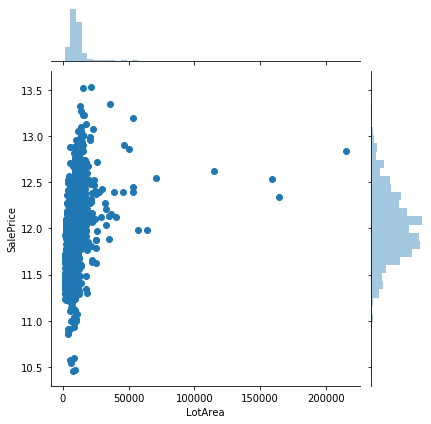

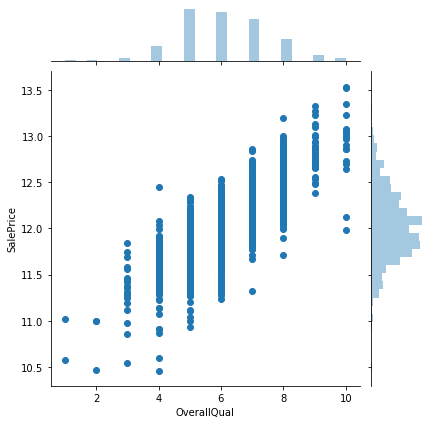

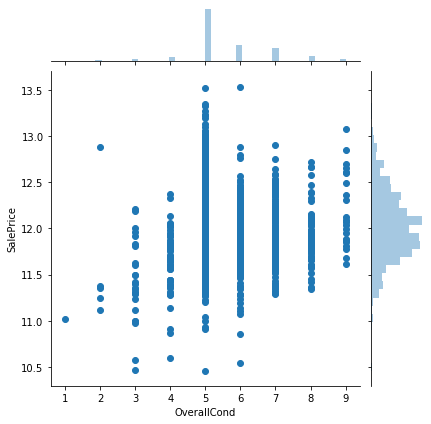

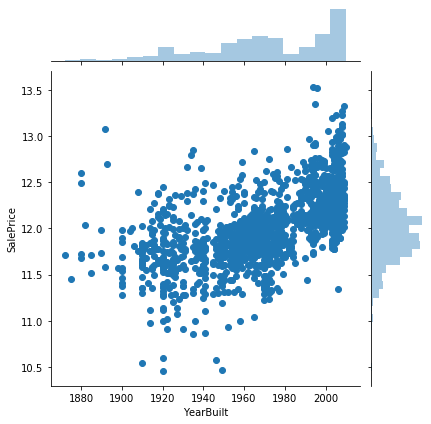

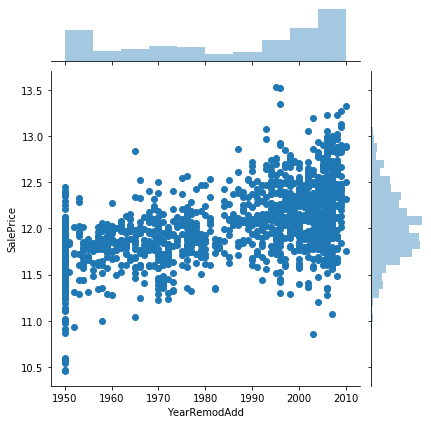

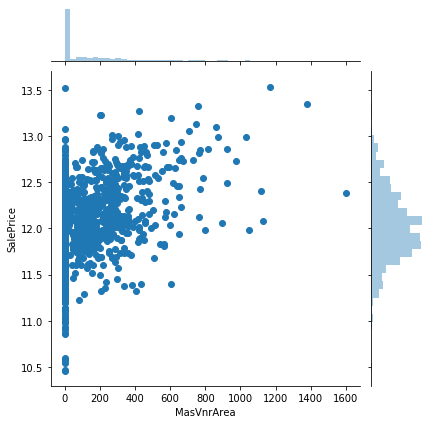

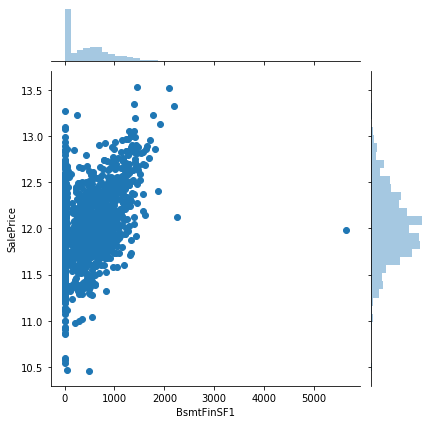

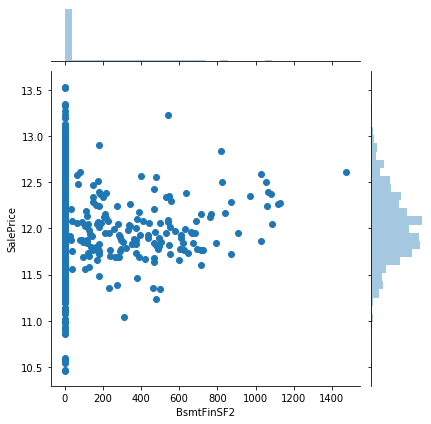

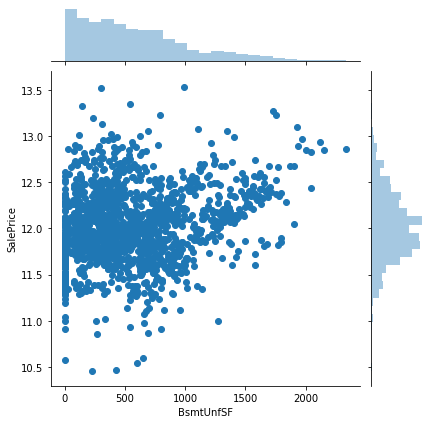

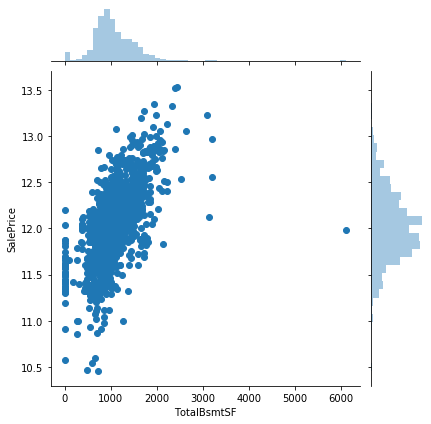

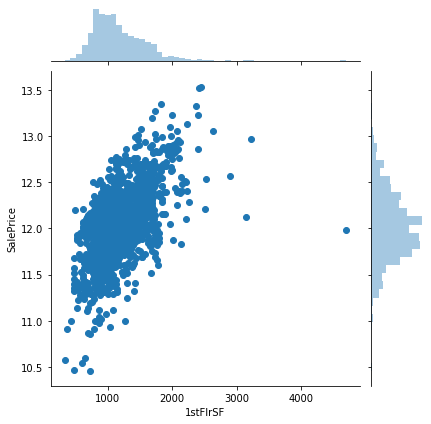

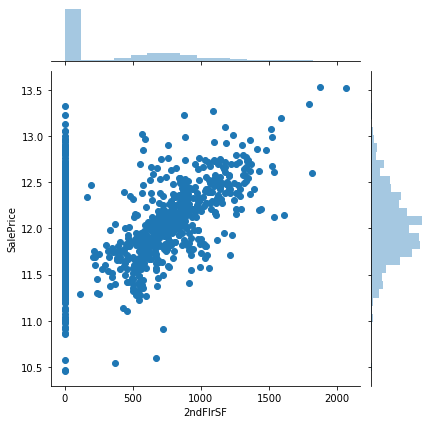

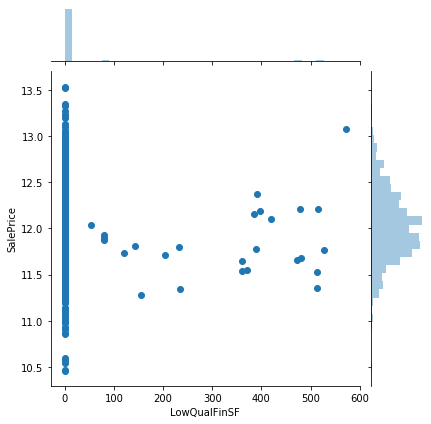

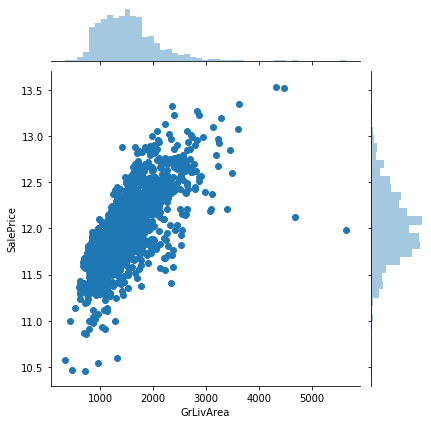

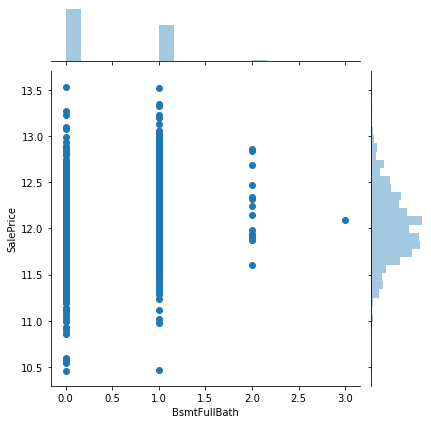

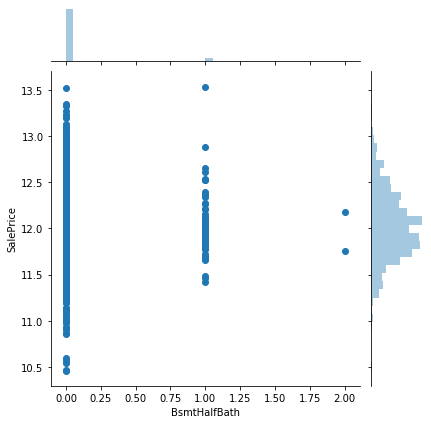

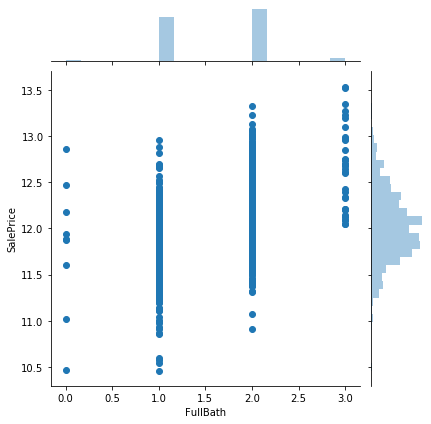

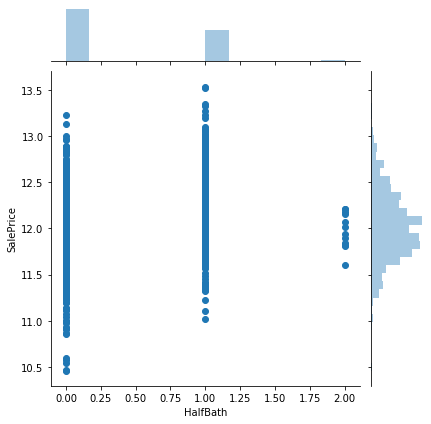

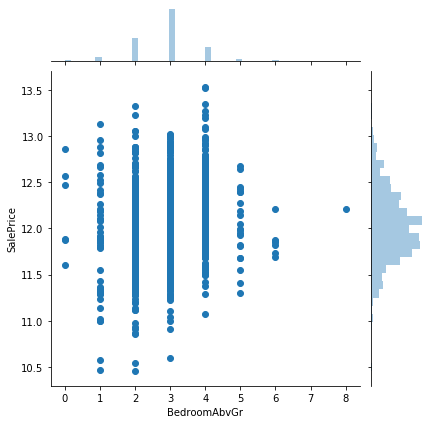

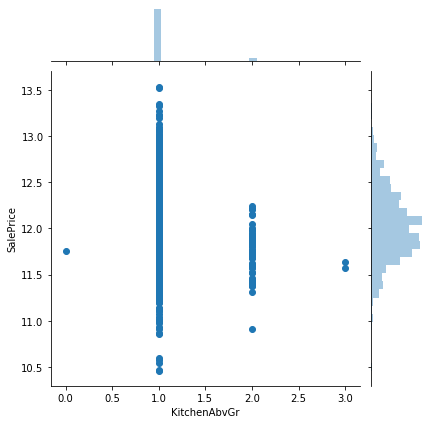

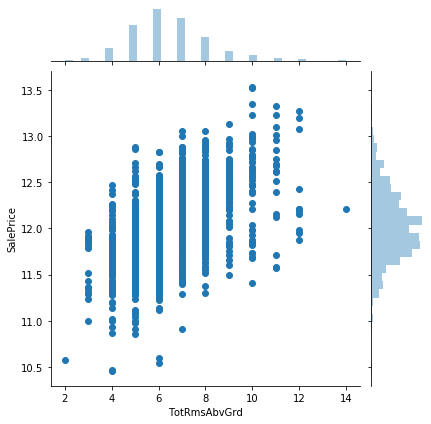

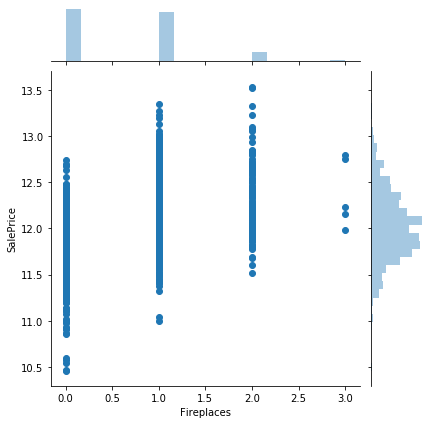

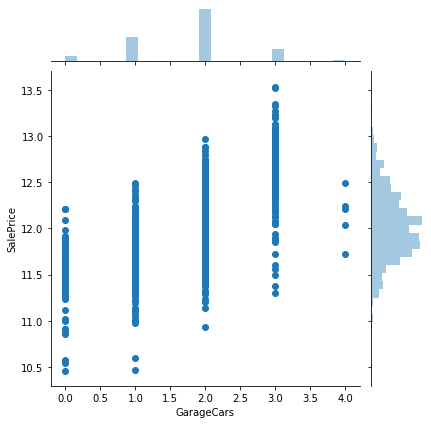

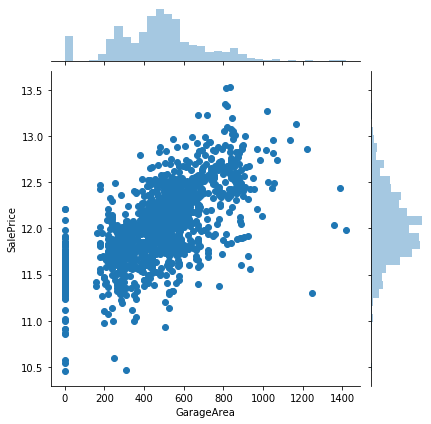

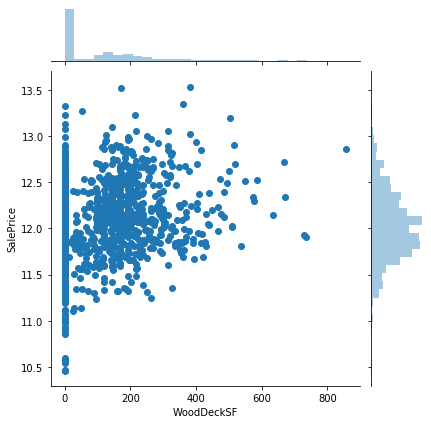

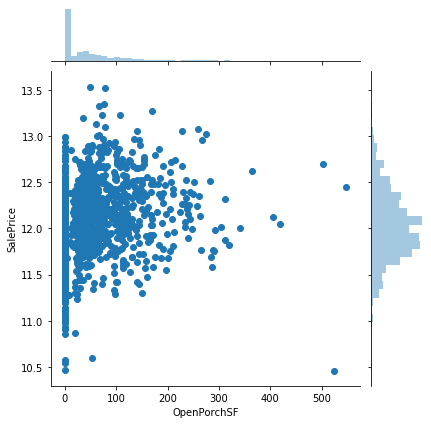

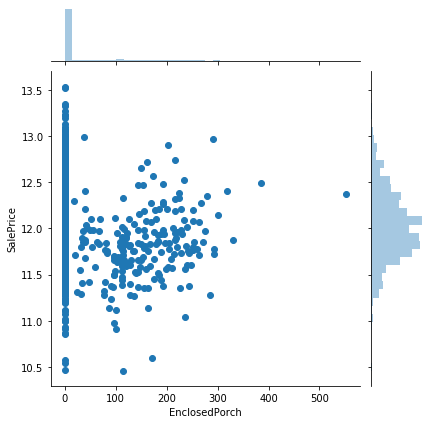

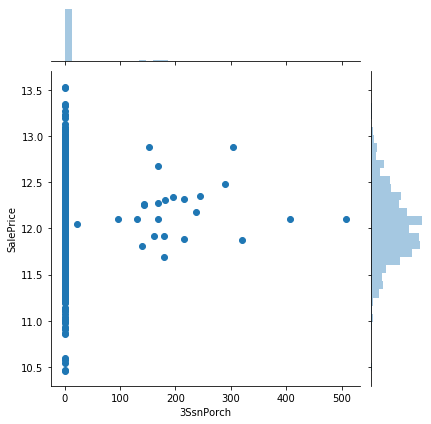

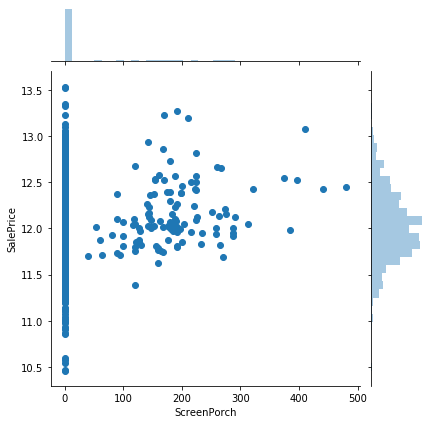

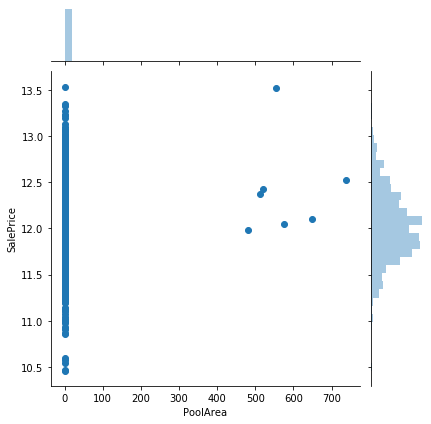

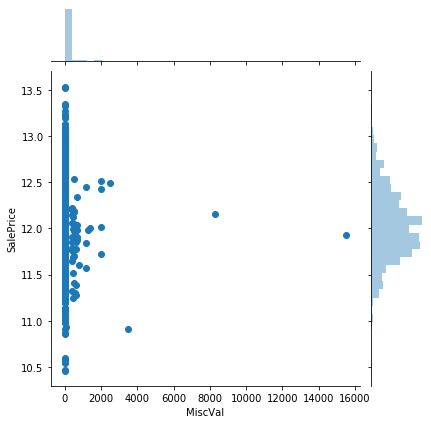

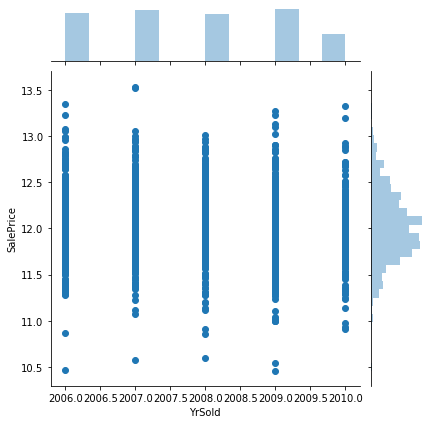

In [12]:

for var in num_variables:
    sns.jointplot( train_data[var] , np.log(train_data['SalePrice']) )
    plt.show()

### Observations from sclatter plots
1. MSSubclass is weakly correlated and seems to be very fragmented distribution - drop
2. Lot area is heavily skewed - might want to remove outliers and/or log scale
3. year variable capturing inflation
4. cont variables with a lot of zeros - 
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
5. a lot of variables might be correlated and might not be adding additional value - Basment area

In [13]:
from scipy.stats import norm

In [14]:
train_data_num.apply(lambda x : stats.skew(x.dropna())) 

LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
YrSold            0.096170
dtype: float64

In [15]:
y = train_data['SalePrice']


### Transform num variables

In [17]:

train_data_num_tran = train_data_num.transform(func = lambda x : stats.boxcox( x + 1)[0]) # fix the sekwness of continuous variables
train_data_num_tran.fillna(train_data_num_tran.mean() , inplace = True)
# Scaling of countinuous variables
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train_data_num_tran[train_data_num_tran.columns] = scaler.fit_transform(train_data_num_tran[train_data_num_tran.columns] ) 

train_data_cat = pd.get_dummies(train_data[cat_variables])
train_data_cat.fillna(0 , inplace = True)


X = pd.concat( [train_data_num_tran , train_data_cat] , axis=1 )

/Users/dhruv/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:902: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/Users/dhruv/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/dhruv/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1031: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


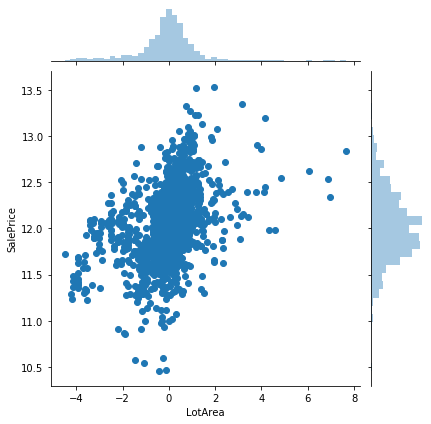

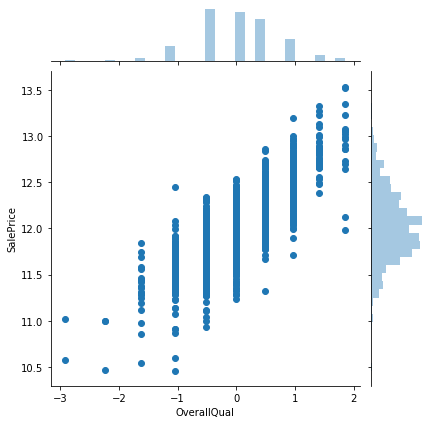

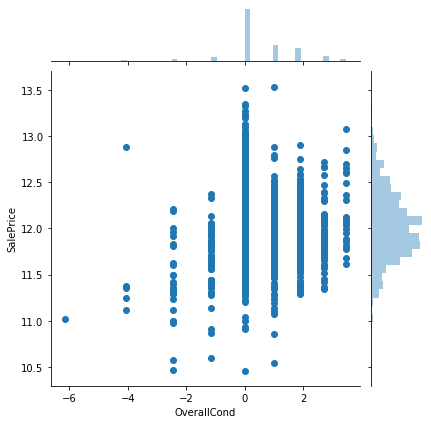

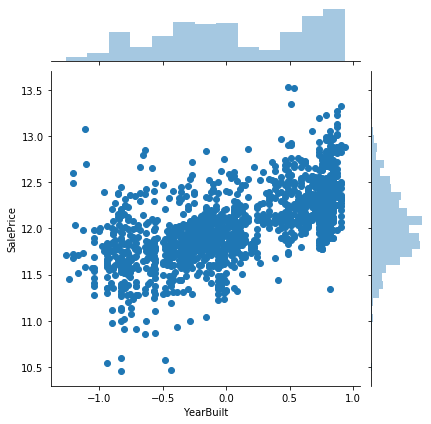

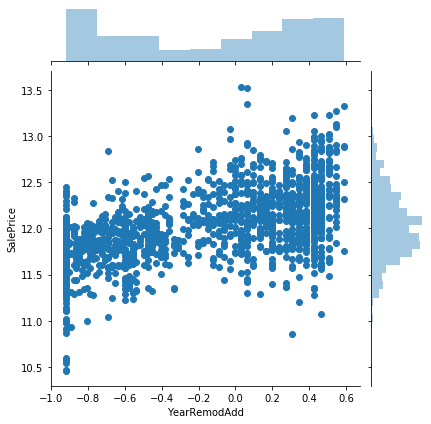

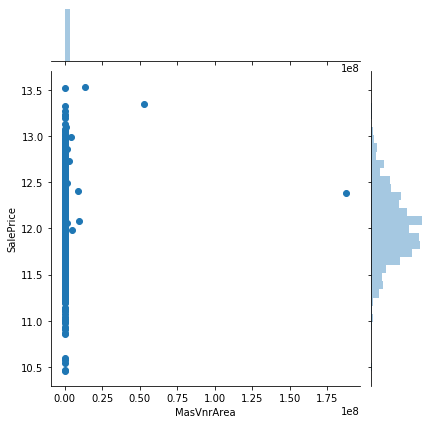

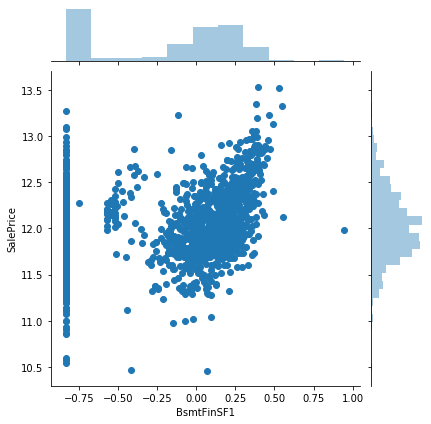

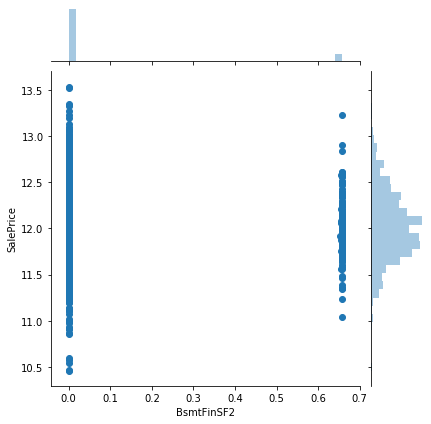

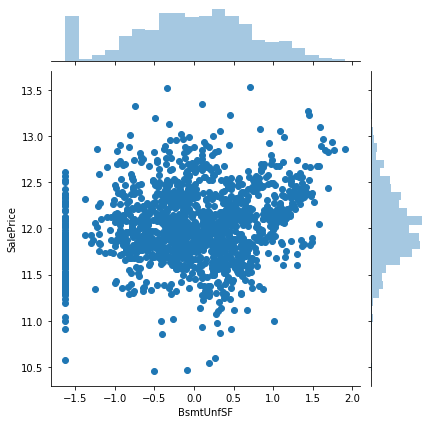

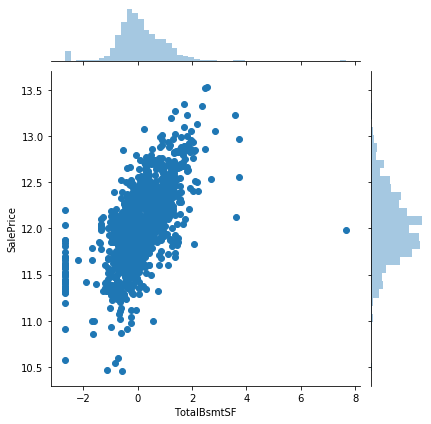

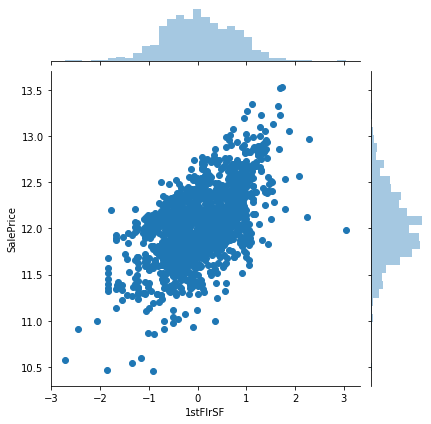

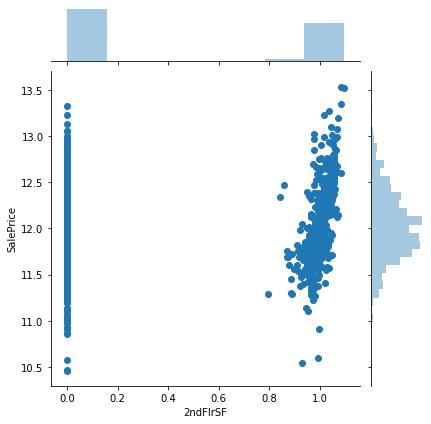

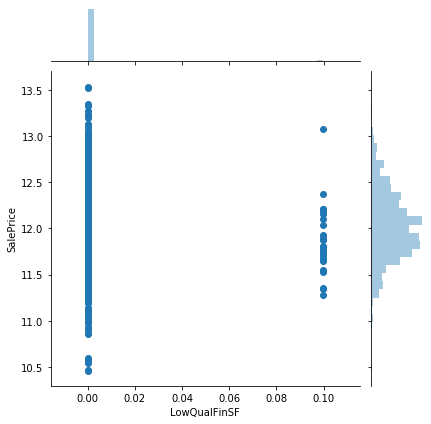

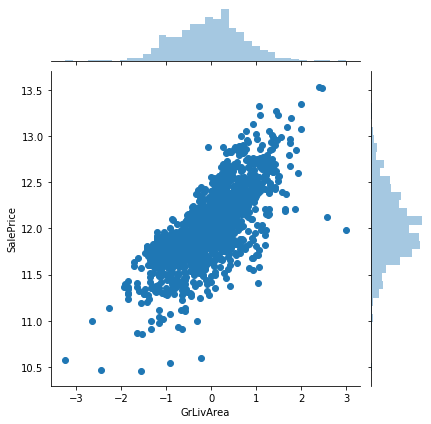

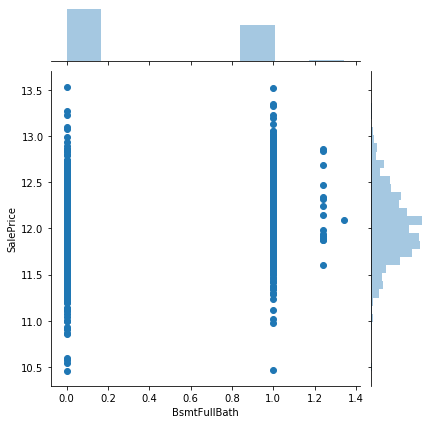

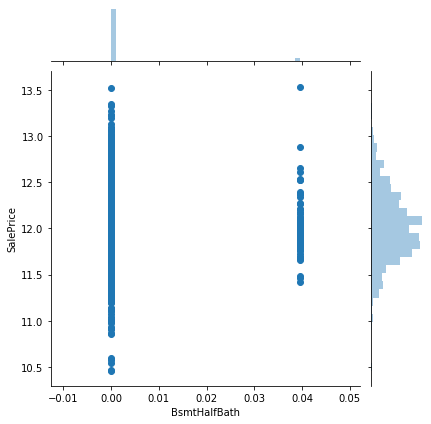

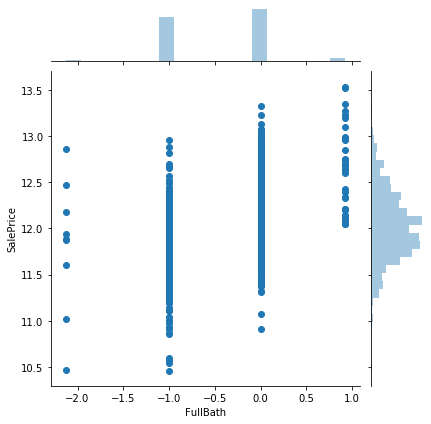

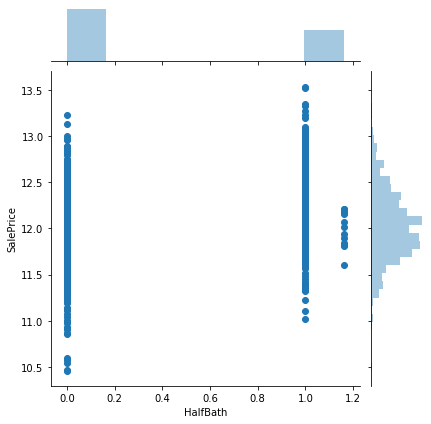

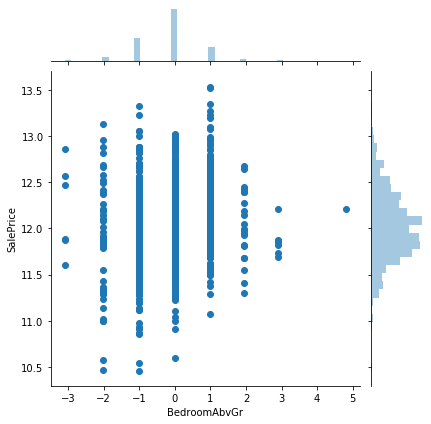

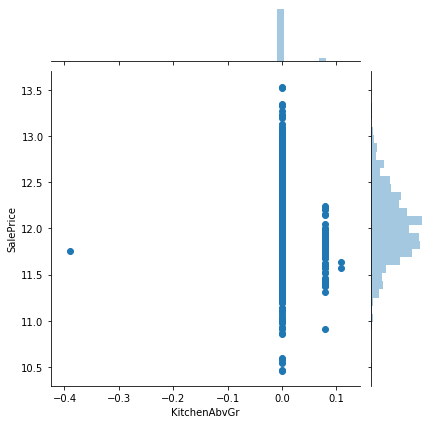

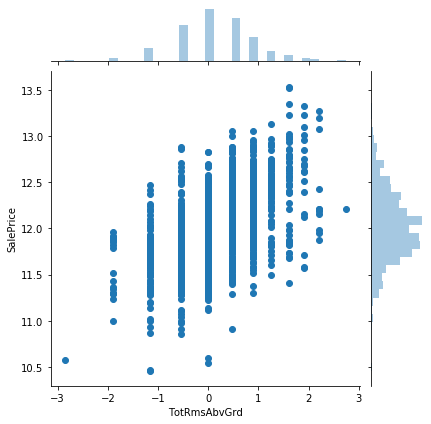

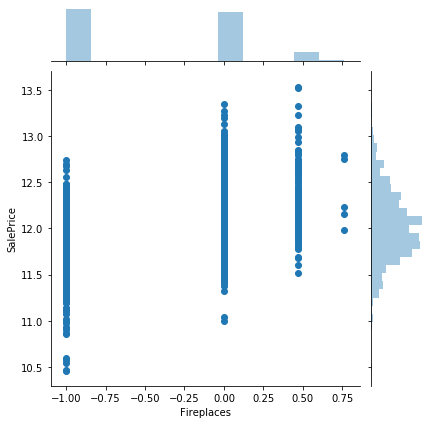

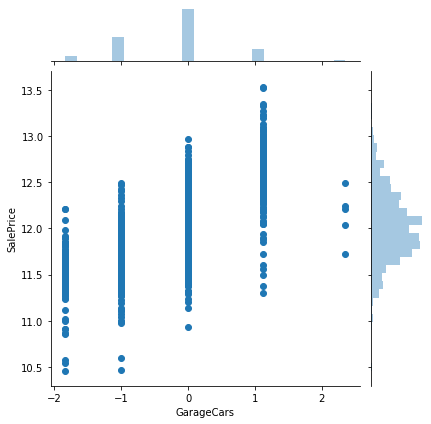

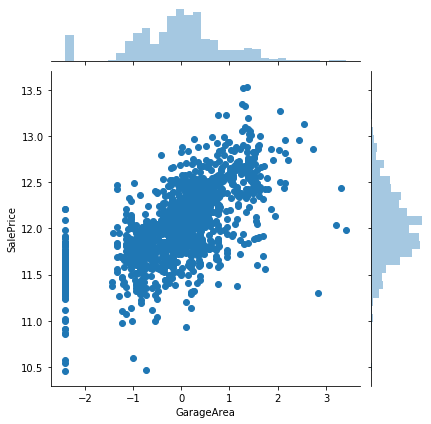

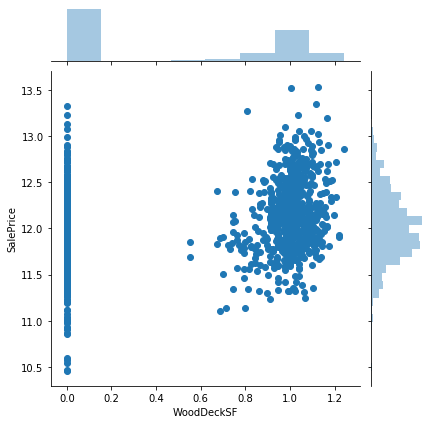

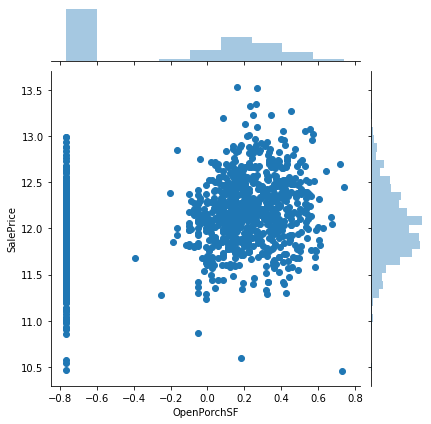

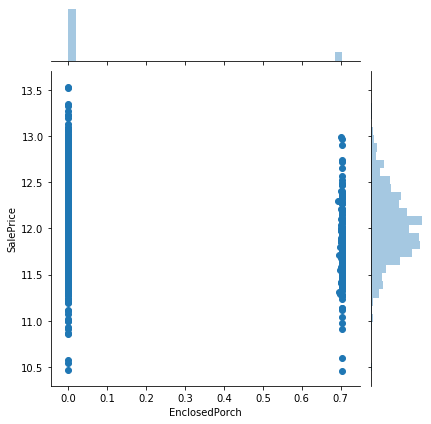

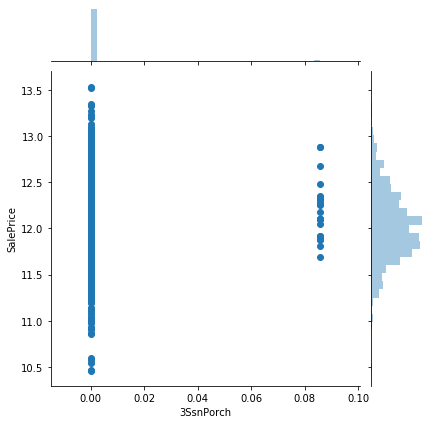

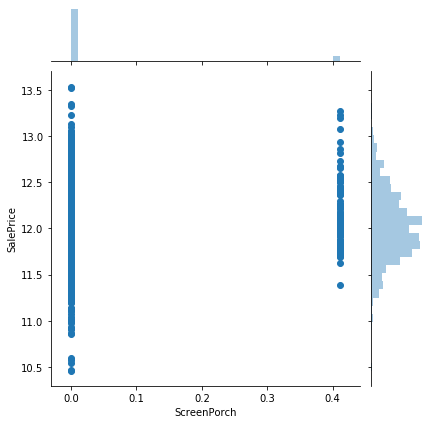

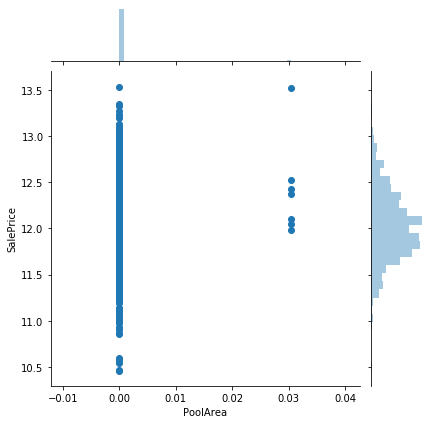

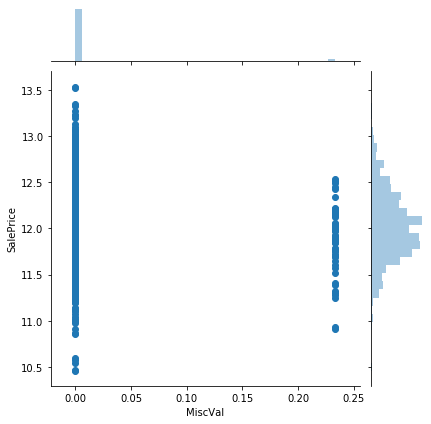

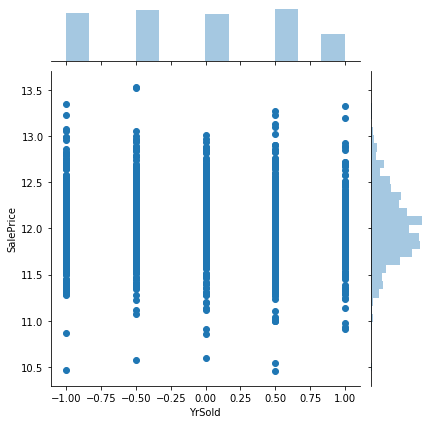

In [20]:
for var in num_variables:
    sns.jointplot( train_data_num_tran[var] , np.log(train_data['SalePrice']) )
    plt.show()

Looking at the distributions - it looks like the following variables are better modelled as (1,0) categorical fetures-
1. BsmtFinSF2
2. 2ndFlrSF
3. LowQualFinSF
4. BsmntFullBath
5. BsmtHalfBath
6. HalfBath
7. MiscVal



## Modelling

In [21]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC , LassoCV, LinearRegression ,Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import xgboost as xgb
#import lightgbm as lgb

In [22]:
def evaluate_model(model ,X , Y ):
    r_squared = np.mean(cross_val_score( model , X , Y ,  cv = 5 , scoring="r2"))
    rmse = np.sqrt(np.mean(-cross_val_score( model , X, Y ,  cv = 5 , scoring="neg_mean_squared_error")))
    print(f"r squared {r_squared} , rmse {rmse} " )

In [23]:
# Optial alpha for lasso

pipeline = Pipeline([
    ('lasso', Lasso())
])

parameters = {
    'lasso__alpha': (0.1,0.01, 0.001, 0.0001, 0.00001,0),
}

grid_search = GridSearchCV(pipeline, parameters, cv=5,n_jobs=-1, verbose=1,)

grid_search.fit(X, np.log(y))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lasso__alpha': (0.1, 0.01, 0.001, 0.0001, 1e-05, 0)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [24]:


modelLinReg = LinearRegression()
evaluate_model(modelLinReg , X , np.log(y))

modelLasso = Lasso(alpha = 0.001)
evaluate_model(modelLasso , X , np.log(y))
modelLasso.fit(X, np.log(y))



r squared 0.8672315602570112 , rmse 0.14594712575130922 
r squared 0.8984322944627088 , rmse 0.1274971855870055 


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Regular linear regression gives better fit score than lasso for using only the 35 odd continuous variables - maybe becuase all of them are significant in explaiing y - lets chech the coefficients.
Since all the independednt variable were normalised, the magnitude of the coefficients given an accurate estimate to the strength of the relationship between each independent varible and dependednt variable.

In [25]:
pd.DataFrame( {'variables':X.columns , 'coefs' : modelLasso.coef_}).sort_values(by = ['coefs'],ascending = False)


,variables,coefs
13,GrLivArea,0.161462
1,OverallQual,0.111007
3,YearBuilt,0.093049
78,Neighborhood_Crawfor,0.084400
94,Neighborhood_StoneBr,0.081042
...,...,...
51,MSZoning_RM,-0.037927
227,CentralAir_N,-0.043240
79,Neighborhood_Edwards,-0.051443
269,SaleCondition_Abnorml,-0.052636


In [26]:
nRejected = sum(modelLasso.coef_ == 0) / len(modelLasso.coef_)
print(f"{round(nRejected*100)} % variables eliminated by lasso")


74.0 % variables eliminated by lasso


Remarkable that almost 3/4 features were rejected by lasso and stil does better than Linear regression. Indicates that a lot of variables we collinear/ had the same information.

Lets look at what lasso retained - 


In [27]:
selected_vars = pd.DataFrame( {'variables':X.columns[modelLasso.coef_ != 0] , 'coefs' : modelLasso.coef_[modelLasso.coef_ != 0]}).sort_values(by = ['coefs'],ascending = False)

selected_vars.head(10)

selected_vars.tail(10)


,variables,coefs
62,KitchenQual_TA,-0.011395
37,Neighborhood_OldTown,-0.011776
69,SaleType_WD,-0.012223
48,ExterQual_TA,-0.015048
27,LandContour_Bnk,-0.031155
26,MSZoning_RM,-0.037927
60,CentralAir_N,-0.043240
33,Neighborhood_Edwards,-0.051443
70,SaleCondition_Abnorml,-0.052636
25,MSZoning_C (all),-0.193055


In [28]:
# Oprimal alpha for ridge regression
# Optial alpha for lasso

pipeline = Pipeline([
    ('ridge', Ridge())
])

parameters = {
    'ridge__alpha': (1000,100,10,1,0.1,0.01, 0.001, 0.0001, 0.00001,0),
}

grid_search = GridSearchCV(pipeline, parameters, cv=5,n_jobs=-1, verbose=1,)

grid_search.fit(X, np.log(y))

grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished
/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.90217e-17): result may not be accurate.
  overwrite_a=True).T


{'ridge__alpha': 10}

In [29]:
modelRidge = Ridge(alpha = 10)
evaluate_model(modelRidge , X , np.log(y))
modelRidge.fit(X, np.log(y))

r squared 0.8933354278338937 , rmse 0.13058124673875854 


/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.89268e-17): result may not be accurate.
  overwrite_a=True).T
/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.81942e-17): result may not be accurate.
  overwrite_a=True).T
/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.89529e-17): result may not be accurate.
  overwrite_a=True).T
/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.63262e-17): result may not be accurate.
  overwrite_a=True).T
/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.89268e-17): result may not be accurate.
  overwrite_a=True).T
/Users/dhruv/anaconda3/li

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
nRejected = sum(modelRidge.coef_ == 0) / len(modelRidge.coef_)
print(f"{round(nRejected*100)} % variables eliminated by ridge")


0.0 % variables eliminated by ridge


In [72]:
# Oprimal alpha for ridge regression
# Optial alpha for lasso

pipeline = Pipeline([
    ('elasticnet', ElasticNet())
])

parameters = {
    'elasticnet__alpha': [1000,100,10,1,0.1,0.01, 0.001, 0.0001, 0.00001,0],
    'elasticnet__l1_ratio': (1,0.50 , 0.1,0.01 ,0)
}

grid_search = GridSearchCV(pipeline, parameters, cv=5,n_jobs=-1, verbose=1,)

grid_search.fit(X, np.log(y))

grid_search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 243 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   34.2s finished


{'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.5}

In [32]:

modelElastic = ElasticNet(alpha = 0.001 , l1_ratio=0.5)
evaluate_model(modelElastic , X , np.log(y))
modelElastic.fit(X, np.log(y))


r squared 0.9005328372680994 , rmse 0.12610190970388369 


ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
nRejected = sum(modelElastic.coef_ == 0) / len(modelElastic.coef_)
print(f"{round(nRejected*100)} % variables eliminated by elastic")

60.0 % variables eliminated by elastic


In [ ]:
# elastic has marginally better performance than ridge or lasso

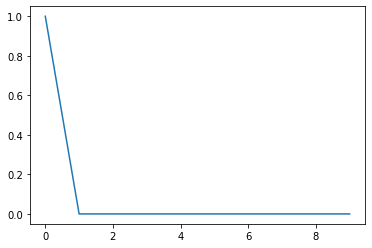

In [34]:
## PCA followed by regresion
pca = PCA()
pca.fit_transform(X)
sns.lineplot( list(range(0,10,1)),pca.explained_variance_ratio_[0:10] )


It is super interesting that almost all the variation in the data has been explaned by just 1 feature. THis is a strange. 
Turns out it is because the PCA does not scale the data. We may have data with very different stdev in the inut eatures since we hav only scaled using IQR.


In [35]:
scaler2 = StandardScaler()
X_hat = X
X_hat[X_hat.columns] = scaler2.fit_transform(X_hat)

/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


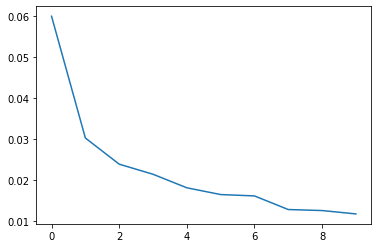

In [36]:
pca = PCA()
X_pca = pca.fit_transform(X_hat)
sns.lineplot( list(range(0,10,1)),pca.explained_variance_ratio_[0:10] )

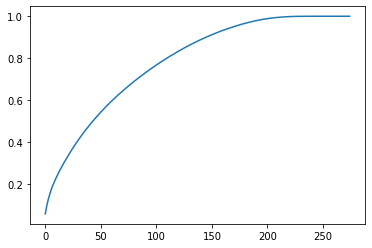

In [37]:
sns.lineplot( range(X.shape[1]), np.cumsum(pca.explained_variance_ratio_))

In [38]:
X_pca[:,:100].shape

(1460, 100)

In [42]:
evaluate_model(modelLasso , X_pca[:,:100], np.log(y))

r squared 0.863951930621025 , rmse 0.1470567839962466 


It doesnt look like PCA is able to reduce the dimensions drastically. TO explain 50% of the cariables - we do need around 50 variables - further  cross validation on any meaningful subset does not improve performance over lasso/ridge.

In [63]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(max_depth=3)

evaluate_model(dec_tree , X ,  y)
dec_tree.fit(X ,  np.log(y))

r squared 0.6835903275526919 , rmse 44447.80474610203 


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [64]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    alpha = ", ".join(feature_names)
    print ("def tree(" , alpha,"):")

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print (f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print (f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print (f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

In [73]:

pipeline = Pipeline([
    ('dec_tree', DecisionTreeRegressor())
])


parameters = {
    'dec_tree__max_depth': list(range(1,21,1)) ,
}

grid_search = GridSearchCV(pipeline, parameters, cv=5,n_jobs=-1, verbose=1,)

grid_search.fit(X, np.log(y))

grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


{'dec_tree__max_depth': 9}

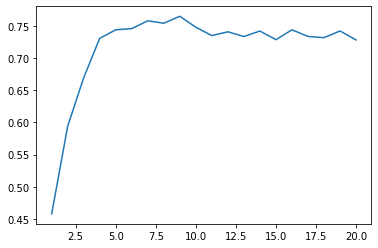

In [78]:
grid_search.cv_results_['mean_test_score']
grid_search.param_grid['dec_tree__max_depth']

sns.lineplot( grid_search.param_grid['dec_tree__max_depth'], grid_search.cv_results_['mean_test_score'])


75% of the variance is explained by 5 levels of depth with marginal or no improvements by adding further depth.

Although the model itself does not perform as well as others, it does . give some insight into feature importance if we closely look at the tree structure using the tree_to_ code function above. Although I do not sho

In [81]:
dec_tree = DecisionTreeRegressor(max_depth=5)

evaluate_model(dec_tree , X ,  np.log(y))
dec_tree.fit(X ,  np.log(y))
tree_to_code(dec_tree, X.columns)

r squared 0.7450464148396103 , rmse 0.20199196914062253 
def tree( LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, YrSold, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSSubClass_20, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSZoning_C (all), MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Grvl, Street_Pave, LotShape_IR1, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_Bnk, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_AllPub, Utilities_NoSeWa, LotConfig_Corner, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3,